In [26]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, accuracy_score

from pandas.plotting import scatter_matrix
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from project_helper import VolFeatures, FuturesCloseData

In [11]:
import pickle
file = open("full_features.pkl",'rb')
full_features = pickle.load(file)

In [18]:
for inst in instrument_dict:
full_features['ES']
y = 2 * (full_features['ES']['ES'] >=0)- 1
X = full_features['ES'].drop(['ES'], axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, shuffle=False )

In [21]:
model = OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     ES   R-squared (uncentered):                   0.057
Model:                            OLS   Adj. R-squared (uncentered):              0.041
Method:                 Least Squares   F-statistic:                              3.483
Date:                Fri, 06 Dec 2019   Prob (F-statistic):                     0.00235
Time:                        19:32:49   Log-Likelihood:                         -484.89
No. Observations:                 349   AIC:                                      981.8
Df Residuals:                     343   BIC:                                      1005.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ES_1M_atm_vol       -6.0584      3.817     -1.587      0.113     -13.566       1.449
ES_1M_RR25          30.0121     20.025      1.499      0.135      -9.375      69.399
ES_1M_Fly25        -95.3129     81.262     -1.173      0.242    -255.148      64.522
ES_2M_RR25         -55.8749     25.739     -2.171      0.031    -106.500      -5.249
ES_2M_Fly25         24.5095     82.460      0.297      0.766    -137.681     186.700
ES_2M_1M_atm_vol   -24.0319     15.548     -1.546      0.123     -54.614       6.550
==============================================================================
Omnibus:                     1904.203   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.924
Skew:                          -0.371   Prob(JB):                     1.95e-12
Kurtosis:                       1.223   Cond. No.                         264.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
accuracy_score(results.predict(X_test)>= 0, y_test)

0.5285714285714286

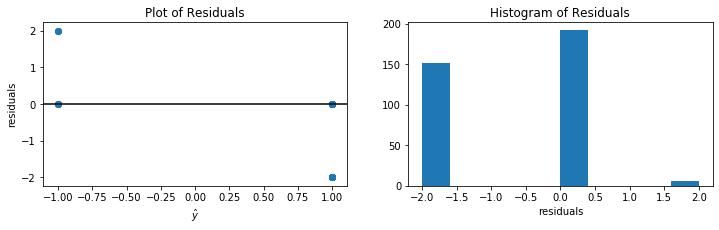

In [36]:
# your code here
y_hat_train = 2 * (results.predict(X_test)>=0)-1
residuals = y_test - y_hat_train
fig, ax = plt.subplots(1,2,figsize=(12,3))

ax[0].scatter(y_hat_train, residuals, alpha=0.5)
ax[0].set_title('Plot of Residuals')
ax[0].set_xlabel(r'$\hat{y}$')
ax[0].set_ylabel('residuals')
ax[0].axhline(0,c='black')

ax[1].hist(residuals)
ax[1].set_title('Histogram of Residuals')
ax[1].set_xlabel(r'residuals')

plt.show()

In [40]:
sum(y_hat_train == 1)

337

In [ ]:
#2.0 y_train long, y_predict short
#-2.0 y_train short, y_predict long